# Day 10: The Stars Align
[link](https://adventofcode.com/2018/day/10)

## Part 1:

In [1]:
test_lines = [
  'position=< 9,  1> velocity=< 0,  2>',
  'position=< 7,  0> velocity=<-1,  0>',
  'position=< 3, -2> velocity=<-1,  1>',
  'position=< 6, 10> velocity=<-2, -1>',
  'position=< 2, -4> velocity=< 2,  2>',
  'position=<-6, 10> velocity=< 2, -2>',
  'position=< 1,  8> velocity=< 1, -1>',
  'position=< 1,  7> velocity=< 1,  0>',
  'position=<-3, 11> velocity=< 1, -2>',
  'position=< 7,  6> velocity=<-1, -1>',
  'position=<-2,  3> velocity=< 1,  0>',
  'position=<-4,  3> velocity=< 2,  0>',
  'position=<10, -3> velocity=<-1,  1>',
  'position=< 5, 11> velocity=< 1, -2>',
  'position=< 4,  7> velocity=< 0, -1>',
  'position=< 8, -2> velocity=< 0,  1>',
  'position=<15,  0> velocity=<-2,  0>',
  'position=< 1,  6> velocity=< 1,  0>',
  'position=< 8,  9> velocity=< 0, -1>',
  'position=< 3,  3> velocity=<-1,  1>',
  'position=< 0,  5> velocity=< 0, -1>',
  'position=<-2,  2> velocity=< 2,  0>',
  'position=< 5, -2> velocity=< 1,  2>',
  'position=< 1,  4> velocity=< 2,  1>',
  'position=<-2,  7> velocity=< 2, -2>',
  'position=< 3,  6> velocity=<-1, -1>',
  'position=< 5,  0> velocity=< 1,  0>',
  'position=<-6,  0> velocity=< 2,  0>',
  'position=< 5,  9> velocity=< 1, -2>',
  'position=<14,  7> velocity=<-2,  0>',
  'position=<-3,  6> velocity=< 2, -1>',
]

import re

def parse(lines):
  return [tuple(map(int, re.findall(r'-?\d+', line))) for line in lines]

test_in = parse(test_lines)
len(test_in), len(test_in[0])

(31, 4)

In [2]:
def is_message(pos):  # Does this list of points represent a message?
  diffs = pos.max(axis=0) - pos.min(axis=0)
  
  if diffs[0]>100 or diffs[1]>20:
    return False
#   print(f'Diffs: {diffs}, max: {pos.max(axis=0)}, min: {pos.min(axis=0)}')
  points = pos.tolist()
  heights = []
  while points:
    x,y = points.pop(len(points)-1)
    height = 1
    ya,yb = y-1,y+1
    while [x,ya] in points:
      points.remove([x,ya])
      height +=1
      ya -= 1
    while [x,yb] in points:
      points.remove([x,yb])
      height += 1
      yb+=1
    if height>1:
      heights.append(height)

  return len(heights)>0 and max(heights)>7

In [3]:
import numpy as np
DTYPE = np.int32

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_formats=['svg']  # Can be: retina
import seaborn as sns; sns.set() # dark, deep, muted, bright, pastel, dark, colorblind; hls, husl.

def print_message(raw, iterations=10):
  pos = np.array([(x,y) for x,y,vx,vy in raw], dtype=DTYPE)
  vel = np.array([(vx,vy) for x,y,vx,vy in raw], dtype=DTYPE)
  f = plt.figure(figsize=(15,30))
  plot_num = 1
  for i in range(iterations):
    pos += vel
    if is_message(pos):
      if plot_num > 9:
        break
      ax = f.add_subplot(910+plot_num)
      ax = sns.scatterplot(x=pos[:,0], y=-pos[:,1], ax=ax, marker='s', s=100)
      ax.set_title(f'{plot_num}. Second {i+1}')
      plot_num += 1
    
  (min_x, min_y), (max_x, max_y) = pos.min(axis=0), pos.max(axis=0)
  return [min_x,max_x], [min_y, max_y]

([-14, 22], [-13, 21])

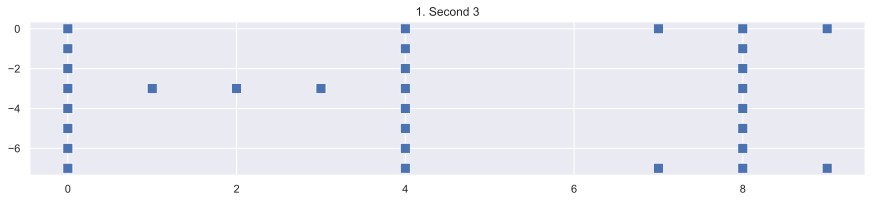

In [4]:
print_message(test_in)

In [5]:
with open('10 input.txt', 'r') as file:
  puzzle_input = parse(file)

len(puzzle_input), len(puzzle_input[0])

(356, 4)

([-46651, 46999], [-46695, 46904])

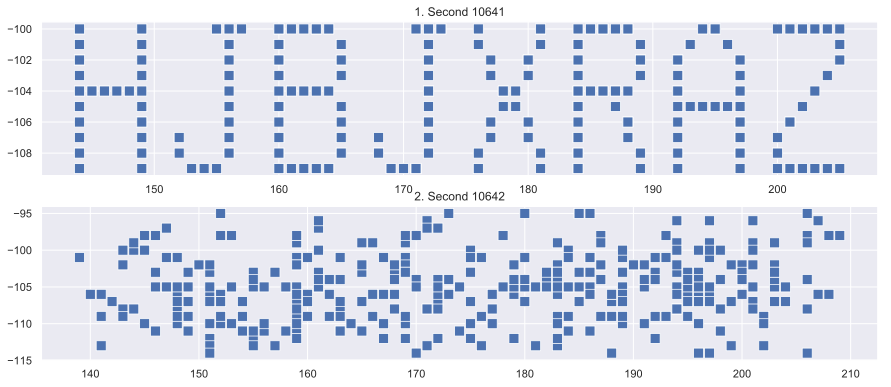

In [6]:
print_message(puzzle_input, 20000)

**Part 1 correct answer:** `HJBJXRAZ`

Incorrect answers:
- `ZARXJBJH`
- `zarxjbjh`

## Part 2: How many seconds?

The message in part 1 appeared on second # `10641` (part 2 correct answer)